<a href="https://colab.research.google.com/github/jatinsharma16/Capstone-Project-Unsupervised/blob/main/Netflix_movie_and_TV_show_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name: Netflix movie and TV show clustering**

Project type: Unsupervised Machine Learning

Contribution: Individual

# **Project Summary:**

# **GITHUB Link**

link: https://github.com/jatinsharma16/Capstone-Project-Unsupervised

# **Problem Statement**

**PROBLEM OVERVIEW**

Netflix as a company is the biggest online platform present at time which provides us with the facility to enjoy movies or TV shows at any given time. In 2018, a report showed that the number of TV shows on Netflix has nearly tripled since 2010 whereas the number of movies has decreased by more than 2000 titles. This shows that how the consumers have shifted from consuming movies to TV shows on regular basis.

The main objective of this project is to bring out the insights hidden in the dataset and bringing out some answers to the questions like what type of content is preferred the most? Do people really prefer watching shows over movies? What are the type of content the people generally love to watch and many more. We will be performing Exploratory Data Analysis to answer these questions and finally we will be clustering the content based on the features which help the platform giving better recommendations and keep their customers engaged.

Giving better recommendations is really important for the OTT platforms since it will generate a interest in the customers and the more engaged the customer is the more revenue the platforms will generate through the customers resulting in profits for the company.

# **Lets Begin**

### Importing libraries and dataset

In [1]:
# Importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem.snowball import SnowballStemmer
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
# mounting the drive for some security reason so that no one can access the data of the file.
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
# Defining the path of the csv file and reading the content of the file
path = "/content/drive/MyDrive/Almabetter/Modules/Machine_Learning/Unsupervised_Capstone_project/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv"
df = pd.read_csv(path)

### Data Description

In [6]:
# let's have a look at the top 5 rows of the data
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [7]:
# let's check the last 5 rows of the data
df.tail()

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef Fares   
7783   s7784    Movie                                   Zubaan  Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan          NaN   
7785   s7786  TV Show                    Zumbo's Just Desserts          NaN   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                                NaN   

                                                country          date_added  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

In [8]:
# checking the shape of the dataset
df.shape

(7787, 12)

The dataset provided to us have 7787 rows which means we have the information about 7787 movies/shows present on the Netflix. Also 12 columns are present in the dataset which will provide us the important information needed for the analysis and clustering.

In [9]:
# checking the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [10]:
# describing the numberical columns present in the dataset.
df.describe()

release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000

In [11]:
df.describe().shape

(8, 1)

- here we can see that we have 8 columns that hold numerical values.

In [12]:
# lets see all the columns present in the dataset
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

<h1> Column Description

- **show_id**: Unique Id for every movie/TV show.
- **type**: tells whether the content is movie or a show.
- **title**: Title of the movie/show.
- **director**: Director of the content.
- **cast**: Cast or the actors involved in the movie/show.
- **country**: The country of production of the movie/show.
- **date_added**: The date when the movie/show was added to Netflix.
- **release_year**: Actual release year of the movie/show.
- **rating**: TV ratings of the show.
- **duration**: Total duration of the movie in minutes or in season for shows.
- **listed_in**: Genre of the movie/show.
- **desciption**: The summary description of the movie/show.

In [13]:
# first we need to process the Date column
df['date_added'] = pd.to_datetime(df['date_added'])
df['year'] = df['date_added'].dt.year
df['month'] = df['date_added'].dt.month

### Handling Duplicate Values

In [ ]:
# Checking for duplicates
df[df.duplicated()]

Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description, year, month]
Index: []

Here we can see that no duplicate values are present in the dataset. Now we will check for the null values.

### Handling Null values

In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
year              10
month             10
dtype: int64

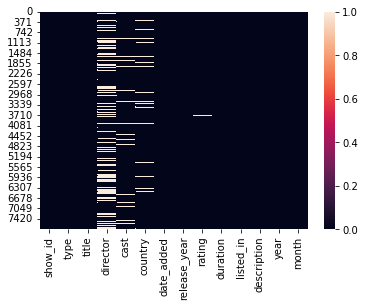

In [ ]:
# Plotting a heatmap to see the null values visually
sns.heatmap(df.isnull())
plt.show()

- Although there are null values present in the dataset but we will be handling these null values after the exploratory data analysis.

## Exploratory Data Analysis

### type column


In [14]:
df.type.value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

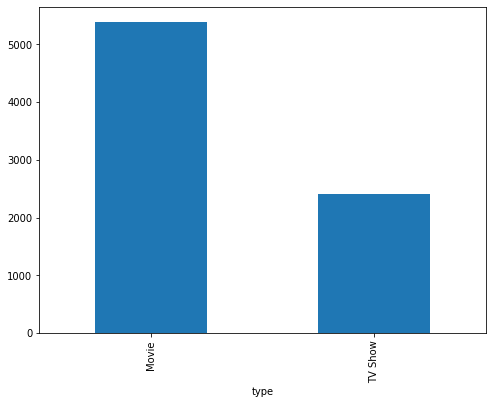

In [15]:
plt.rcParams["figure.figsize"] = (8,6)
df.groupby('type')['show_id'].count().plot(kind='bar')
plt.show()

- We have used a bar chart to see the difference in the quantity of different types of productions.
- We can see that in the dataset, most of the productions are of type 'movies' and the count of 'tv shows' is around 50% of the movies.

### Title column

Since we will be working with the textual data therefore it becomes necessary to process the words as well. We will be using word cloud to see what are the most used words in this column.

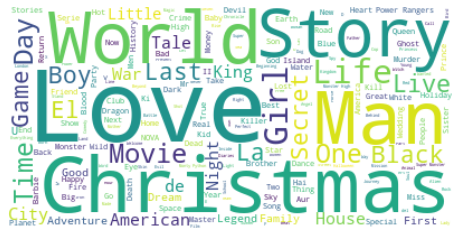

In [16]:
# making a variable for all the column values
df_word_cloud = df['title']
# joining all the words to make a single string so that we can process the string 
text = " ".join(word for word in df_word_cloud)
# Create a list of stopwords
stopwords = set(STOPWORDS)
# generating a wordcloud image using the wordcloud library
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Displaying the image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

- We have used a WordCloud to see what are the most used words in the titles.
- As per the WordCloud some of the most used words irrespective of the type of production are 'Love', 'Man', 'Christmas', 'World', 'Story' and so on.

In [17]:
len(df['title'].unique())

7787

- We can see that no two productions share the same name.

### Director

In [18]:
len(df['director'].unique())

4050

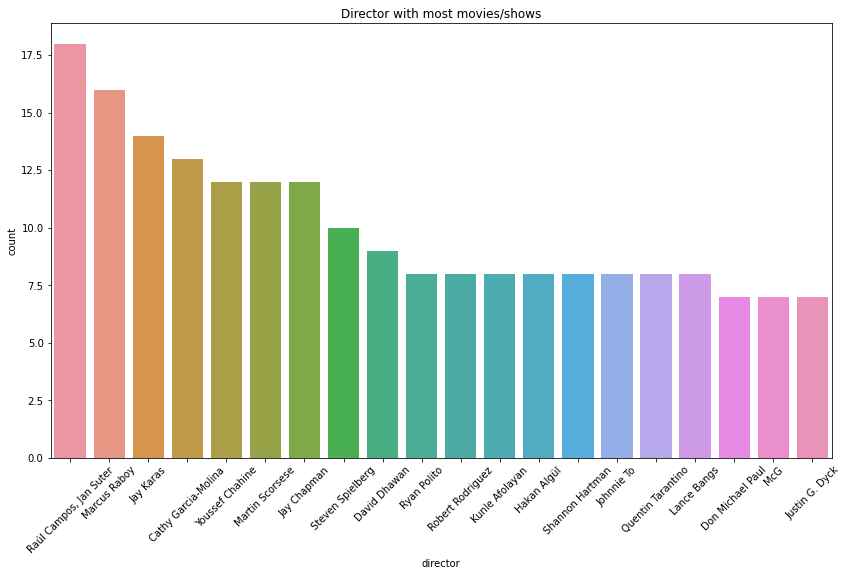

In [19]:
# plotting the top 20 directors using seaborn 
plt.rcParams["figure.figsize"] = (14,8)
sns.countplot(x='director',data=df,order=df.director.value_counts().head(20).index)
plt.title('Director with most movies/shows')
plt.xticks(rotation = 45)
plt.show()

- Here we have used a bar graph to compare the projects of different directors.
- Among the top 20 directors, Raul Campos and Jan Suter have the most number of productions followed by Marcus Raboy and Jay karas.

### Cast

In [20]:
df['cast'] = df['cast'].fillna('')

In [21]:
df_actors = df['cast'].copy()

In [22]:
df_actors.head()

0    João Miguel, Bianca Comparato, Michel Gomes, R...
1    Demián Bichir, Héctor Bonilla, Oscar Serrano, ...
2    Tedd Chan, Stella Chung, Henley Hii, Lawrence ...
3    Elijah Wood, John C. Reilly, Jennifer Connelly...
4    Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...
Name: cast, dtype: object

In [23]:
df['cast'][0]

'João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi'

In [24]:
# Making a dictionary for actors to analyse their performance
cast_count = {}
cast_final_list = []
cast_list = []
for item in df['cast']:
  cast_list.append(item.split(', '))
# cast_list
for item in range(len(cast_list)):
  cast_final_list.extend(cast_list[item])
# cast_final_list
for item in cast_final_list:
  if item not in cast_count:
    cast_count[item] = cast_final_list.count(item)
# cast_count

In [25]:
cast_df = pd.DataFrame.from_dict(cast_count, orient = 'index', columns = ['count']).sort_values('count', ascending= False)

In [26]:
cast_df.head()

count
                    718
Anupam Kher          42
Shah Rukh Khan       35
Om Puri              30
Naseeruddin Shah     30

- We have created a dataframe which holds the actors' name and the number of productions they have worked in.

In [27]:
cast_df.drop(index='', axis=0, inplace=True)

In [28]:
cast_df.head()

count
Anupam Kher          42
Shah Rukh Khan       35
Om Puri              30
Naseeruddin Shah     30
Takahiro Sakurai     29

Now, we have out dataframe ready therefore we can analyse the cast.

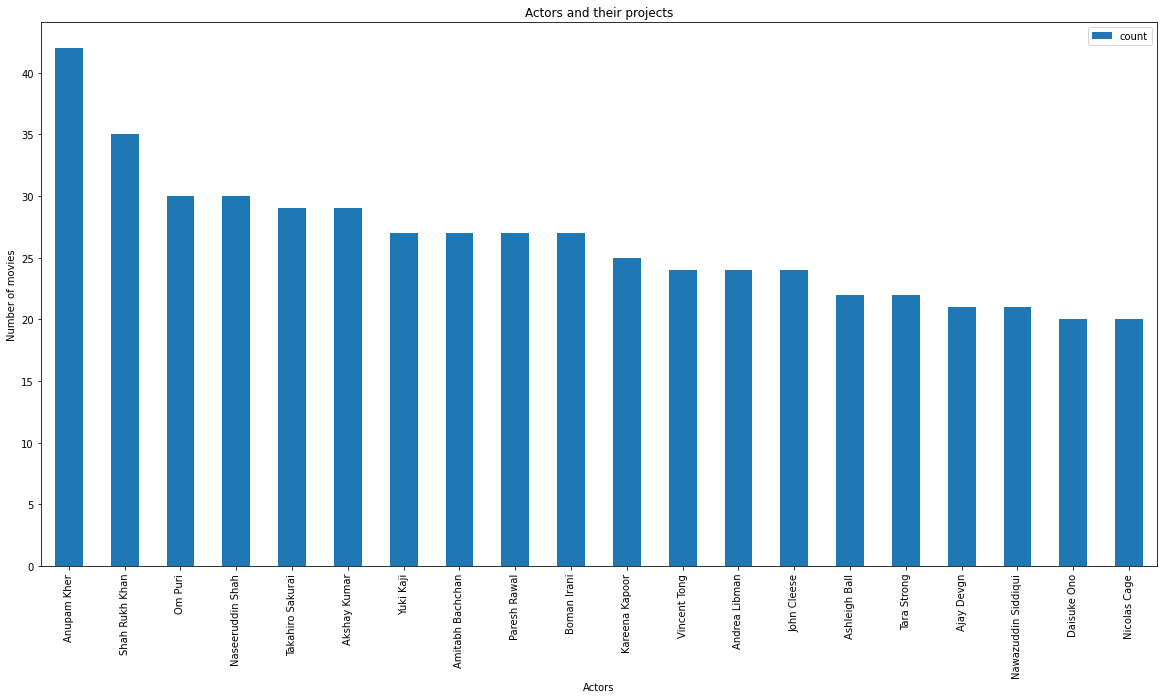

In [29]:
plt.rcParams["figure.figsize"] = (20, 10)
cast_df.head(20).plot(kind='bar')
plt.xlabel('Actors')
plt.ylabel('Number of movies')
plt.title('Actors and their projects')
plt.show()

- We have used a bar plot to compare the number of productions an actor has worked in.
- We can see that 'Anupam Kher', 'Shah Rukh Khan' and 'Om Puri' are the top 3 actors that have worked in most number of productions.

### Country

In [30]:
# Making a dataframe for countries as well

country_list = []
movie_list = []
show_list = []
for index in range(len(df)):
  if type(df['country'][index]) == str:
    item = df['country'][index].split(",")
    for i in item:
      country_list.append(i.strip())
      if df['type'][index] == 'Movie':
        movie_list.append(i.strip())
      if df['type'][index] == 'TV Show':
        show_list.append(i.strip())
country_details = list(set([(i, country_list.count(i), movie_list.count(i), show_list.count(i)) for i in country_list]))

In [31]:
country_df = (pd.DataFrame(country_details, columns=['country', 'productions', 'movies', 'shows'])).sort_values('productions', ascending=False)
country_df.reset_index()

index         country  productions  movies  shows
0       75   United States         3297    2431    866
1       76           India          990     915     75
2      104  United Kingdom          723     467    256
3       45          Canada          412     286    126
4       10          France          349     265     84
..     ...             ...          ...     ...    ...
113     18       Mauritius            1       0      1
114     88         Bahamas            1       1      0
115     13          Latvia            1       1      0
116     24           Syria            1       0      1
117     78          Cyprus            1       0      1

[118 rows x 5 columns]

- To analyze the countries, we have created a dataframe that will help us understand how many productions are made in any country and what was the count of movies and tv shows in that count.

In [32]:
country_df.head()

country  productions  movies  shows
75    United States         3297    2431    866
76            India          990     915     75
104  United Kingdom          723     467    256
45           Canada          412     286    126
10           France          349     265     84

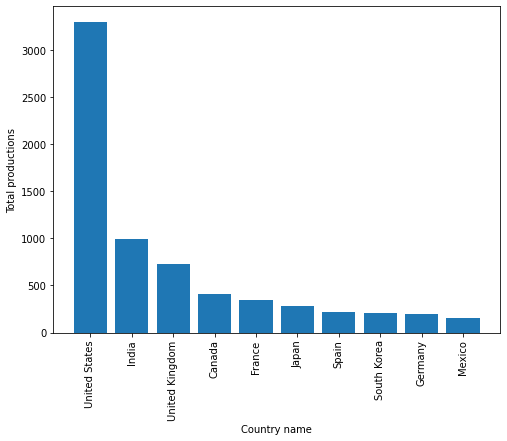

In [33]:
# lets look at the top 10 countries in terms of production
plt.rcParams["figure.figsize"] = (8,6)
plt.bar(x=country_df['country'].head(10), height=country_df['productions'].head(10))
plt.xlabel('Country name')
plt.ylabel('Total productions')
plt.xticks(rotation=90)
plt.show()

- We are using a bar graph to see the count of productions that are being made in any country.
- We can see that United States has the most number of productions followed by India and United Kingdom.

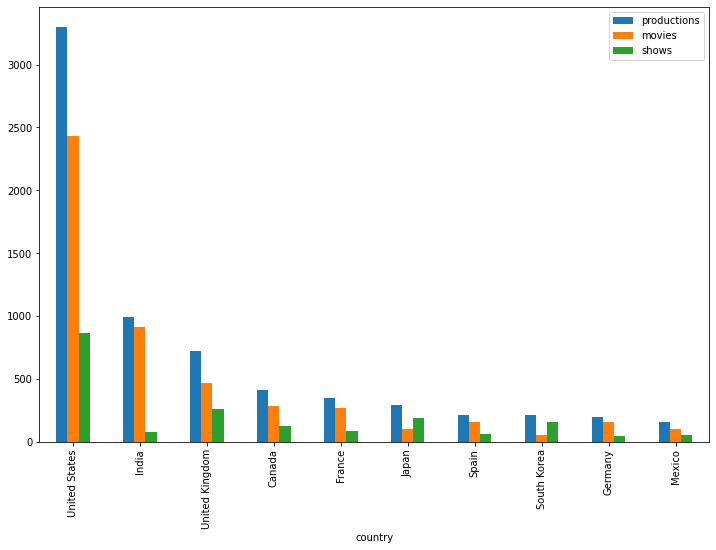

In [34]:
# Lets see the distribution in terms of movies and shows
plt.rcParams["figure.figsize"] = (12,8)
country_df.head(10).plot(x='country', y=['productions', 'movies', 'shows'], kind='bar')
plt.show()

- Here we have used a grouped bar graph to see what is the division of movies and tv shows among the total production in any country.
- We can see that the ratio of movie to tv shows in most of the countries is quite impressive but in case of India, the ratio is really low, the reason might be that Indian audience love to watch movies rather than the shows. Also in countries like Japan, the count of tv shows are more, the craze for the anime might be the reason for this.

### Date Added

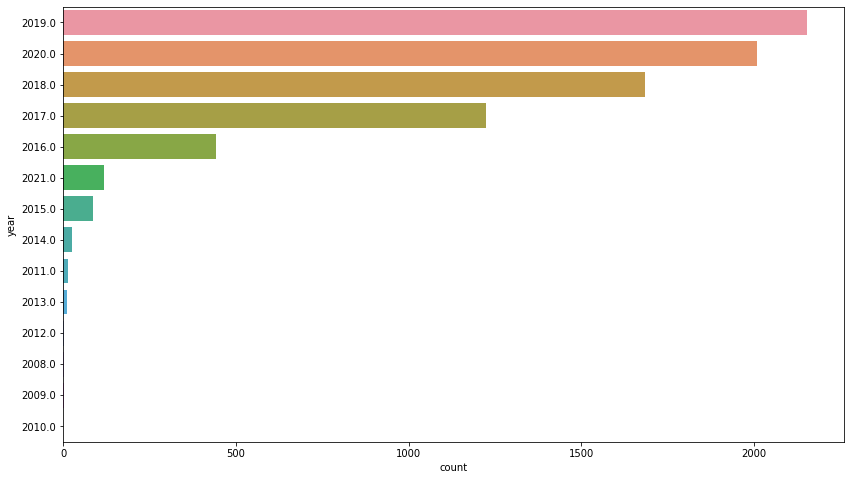

In [35]:
# Analyzing for years
plt.rcParams["figure.figsize"] = (14,8)
sns.countplot(y="year", data=df, order=df['year'].value_counts().index[0:15])
plt.show()

- Here we are using a horizontal bar plot to see the quantity of productions with respect to the year they are added on Netflix.
- We can see that in our dataset, 2019 is the year when most number of projects are added followed by 2020 and 2018.

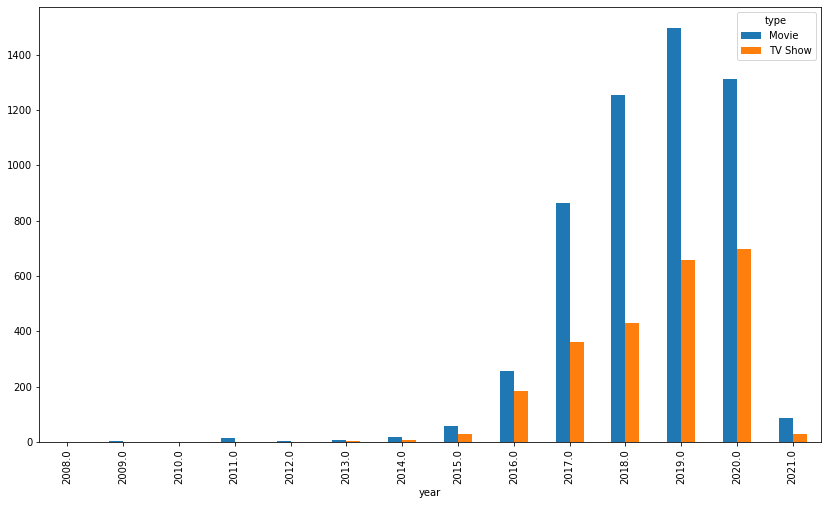

In [36]:
# Content wise plotting the graph
plt.rcParams["figure.figsize"] = (14,8)
df.groupby(['year', 'type'])['show_id'].count().unstack().plot(kind='bar')
plt.show()

- Here we are using grouped bar chart to see the ratio of movies and tv shows added to Netflix over the years.
- We can clearly see that although the count of the productions are increasing yet the number of tv shows are still half the number of movies that are added per year.

### Rating

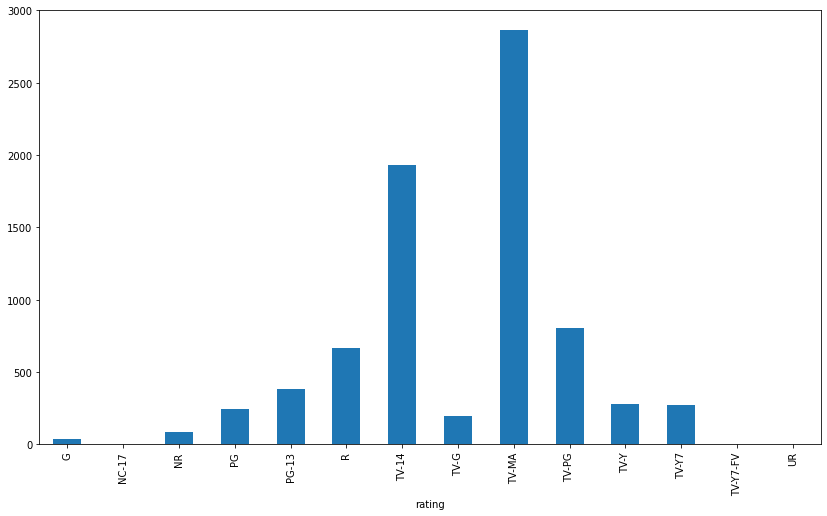

In [37]:
plt.rcParams["figure.figsize"] = (14,8)
df.groupby('rating')['show_id'].count().plot(kind= 'bar')
plt.show()

- Here we are using a bar graph to see the number of productions and the rating they are associated with.
- We can see that TV-MA rating has the most number of productions followed by 'TV-14'.

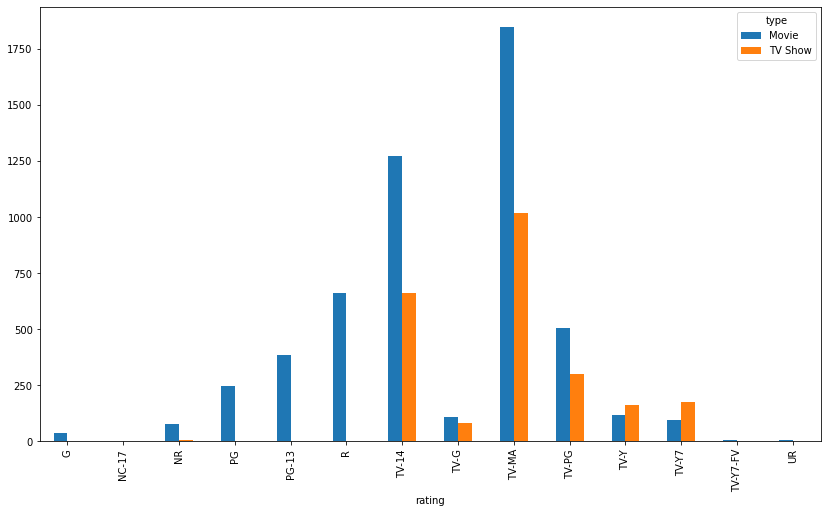

In [38]:
# Rating with respect to the content type
plt.rcParams["figure.figsize"] = (14,8)
df.groupby(['rating', 'type'])['show_id'].count().unstack().plot(kind='bar')
plt.show()

- Here we are using grouped bar graph to see the ratio of tv shows and movies and how they are associated with the ratings.
- We can see that the ratio of tv shows for ratings like 'TV-MA' or 'TV-14' is almost 50% whereas for ratings like 'TV-Y' or 'TV-Y7', this ratio is greater than one. Some ratings are also there which do now have any tv shows associated with them.

### Duration

In [39]:
# We need to analyze the duration of movies and shows differently as the duration of movies is given in minutes 
# while that of shows is given in season
df_shows=df[df['type']=='TV Show']
df_movies=df[df['type']=='Movie']

# Analyzing the duration of movies first
df_movies['duration'] = df_movies['duration'].str.replace(' min', '')
df_movies['duration'] = df_movies['duration'].astype(int)
df_movies['duration'].head()

1     93
2     78
3     80
4    123
6     95
Name: duration, dtype: int64

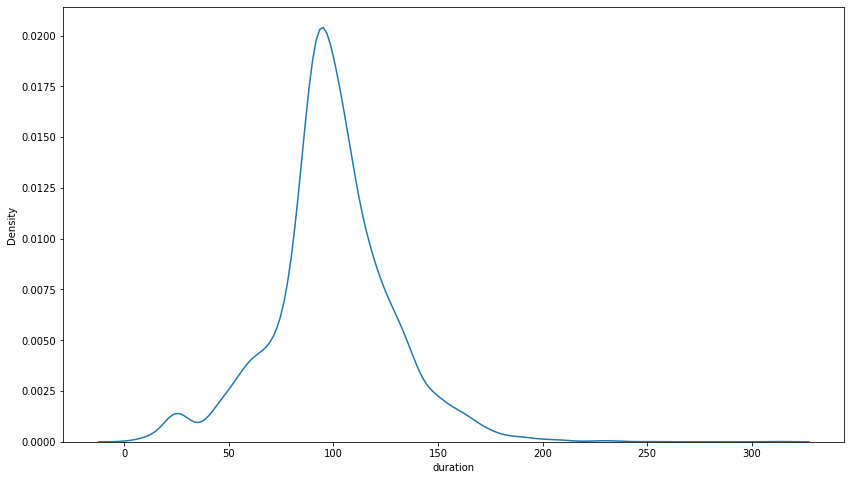

In [40]:
plt.rcParams["figure.figsize"] = (14,8)
sns.kdeplot(data=df_movies['duration'])
plt.show()

- Here we are using a density graph to see what is the duration of most number of movies.
- We can see that the majority of movies have a duration between 60 minutes to 150 minutes, i.e. between 1 hour to 2.5 hours.

In [41]:
# Analyzing for TV shows

df_shows['duration'] = df_shows['duration'].str.replace(' Seasons', '')
df_shows['duration'] = df_shows['duration'].str.replace(' Season', '')
df_shows['duration'] = df_shows['duration'].astype(int)

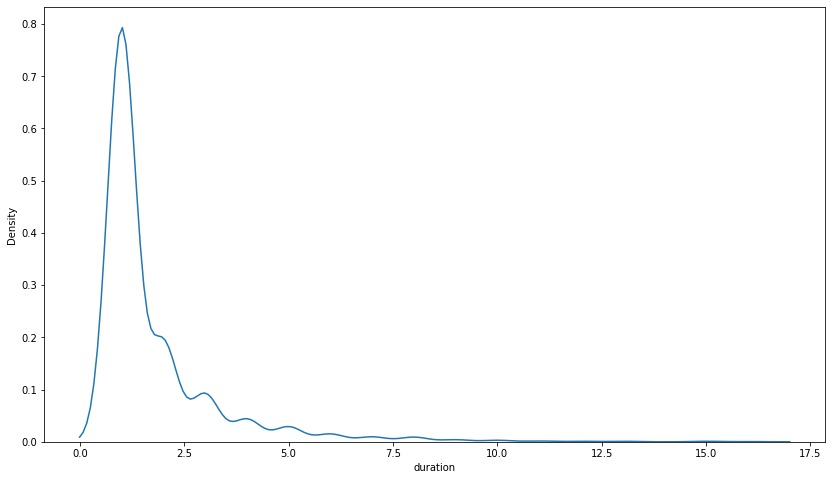

In [42]:
# Plotting distribution plot for shows duration
plt.rcParams["figure.figsize"] = (14,8)
sns.kdeplot(data=df_shows['duration'])
plt.show()

- Here also we have used a density graph to see the duration of tv shows in terms of seasons.
- We can observe that majority of tv shows have 1 or 2 seasons and a very less amount of shows have more than 3 seasons.

### Listed in (Genre)

In [43]:
df.groupby('listed_in')['show_id'].count()

listed_in
Action & Adventure                                              99
Action & Adventure, Anime Features, Children & Family Movies     3
Action & Adventure, Anime Features, Classic Movies               1
Action & Adventure, Anime Features, Horror Movies                1
Action & Adventure, Anime Features, International Movies        28
                                                                ..
TV Horror, TV Mysteries, Teen TV Shows                           1
TV Horror, Teen TV Shows                                         1
TV Sci-Fi & Fantasy, TV Thrillers                                1
TV Shows                                                        12
Thrillers                                                       49
Name: show_id, Length: 492, dtype: int64

In [44]:
# Since every movie is listed in multiple genres therefore lets make a list of all the genres and count of movies
all_genre = []
genre_count = {}
genre_list = list(df['listed_in'])
# genre_list
for item in range(len(genre_list)):
  all_genre.extend(genre_list[item].split(", "))
# all_genre
for item in all_genre:
  if item not in genre_count:
    genre_count[item] = all_genre.count(item)
genre_count

{'International TV Shows': 1199,
 'TV Dramas': 704,
 'TV Sci-Fi & Fantasy': 76,
 'Dramas': 2106,
 'International Movies': 2437,
 'Horror Movies': 312,
 'Action & Adventure': 721,
 'Independent Movies': 673,
 'Sci-Fi & Fantasy': 218,
 'TV Mysteries': 90,
 'Thrillers': 491,
 'Crime TV Shows': 427,
 'Docuseries': 353,
 'Documentaries': 786,
 'Sports Movies': 196,
 'Comedies': 1471,
 'Anime Series': 148,
 'Reality TV': 222,
 'TV Comedies': 525,
 'Romantic Movies': 531,
 'Romantic TV Shows': 333,
 'Science & Nature TV': 85,
 'Movies': 56,
 'British TV Shows': 232,
 'Korean TV Shows': 150,
 'Music & Musicals': 321,
 'LGBTQ Movies': 90,
 'Faith & Spirituality': 57,
 "Kids' TV": 414,
 'TV Action & Adventure': 150,
 'Spanish-Language TV Shows': 147,
 'Children & Family Movies': 532,
 'TV Shows': 12,
 'Classic Movies': 103,
 'Cult Movies': 59,
 'TV Horror': 69,
 'Stand-Up Comedy & Talk Shows': 52,
 'Teen TV Shows': 60,
 'Stand-Up Comedy': 329,
 'Anime Features': 57,
 'TV Thrillers': 50,
 'Classi

In [45]:
genre_df = pd.DataFrame.from_dict(genre_count, orient='index', columns = ['count']).sort_values('count', ascending = False)

In [46]:
genre_df

count
International Movies           2437
Dramas                         2106
Comedies                       1471
International TV Shows         1199
Documentaries                   786
Action & Adventure              721
TV Dramas                       704
Independent Movies              673
Children & Family Movies        532
Romantic Movies                 531
TV Comedies                     525
Thrillers                       491
Crime TV Shows                  427
Kids' TV                        414
Docuseries                      353
Romantic TV Shows               333
Stand-Up Comedy                 329
Music & Musicals                321
Horror Movies                   312
British TV Shows                232
Reality TV                      222
Sci-Fi & Fantasy                218
Sports Movies                   196
Korean TV Shows                 150
TV Action & Adventure           150
Anime Series                    148
Spanish-Language TV Shows       147
Classic Movies                  103
LGBTQ Movies                     90
TV Mysteries                     90
Science & Nature TV              85
TV Sci-Fi & Fantasy              76
TV Horror                        69
Teen TV Shows                    60
Cult Movies                      59
Faith & Spirituality             57
Anime Features                   57
Movies                           56
Stand-Up Comedy & Talk Shows     52
TV Thrillers                     50
Classic & Cult TV                27
TV Shows                         12

- For analyzing the data w.r.t. the genre, we have created a dataframe that holds the data for the number of productions that that belong to any genre.

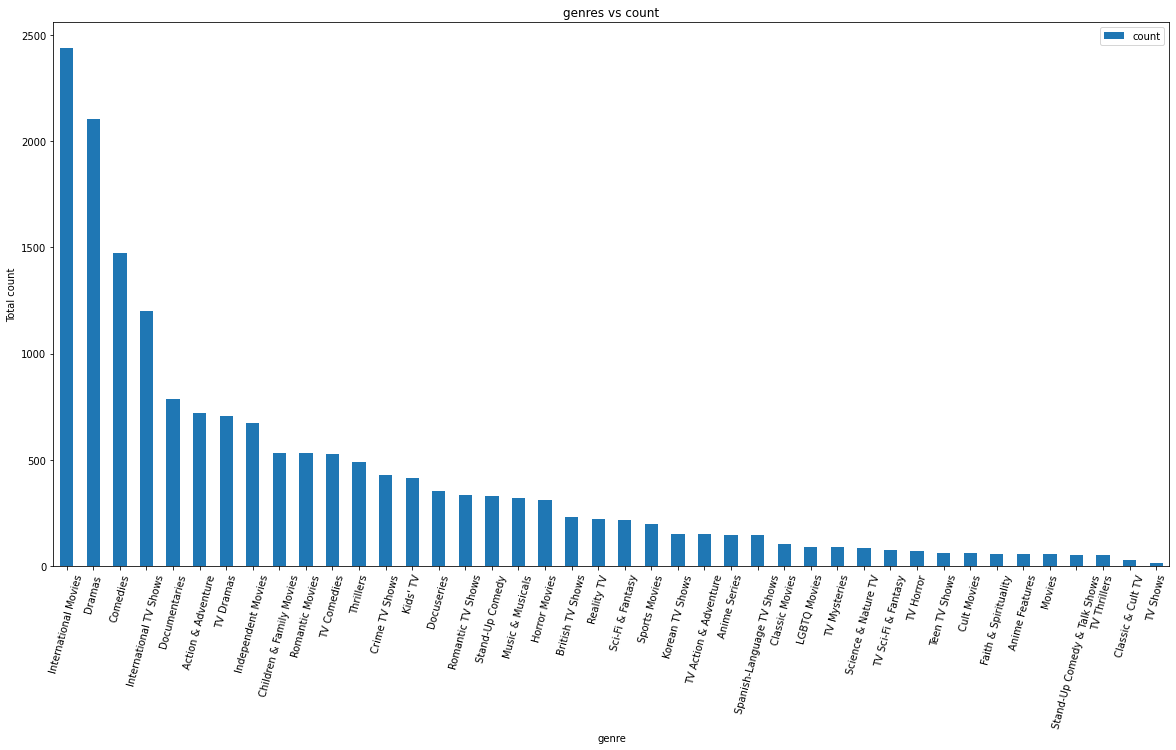

In [47]:
plt.rcParams["figure.figsize"] = (20, 10)
genre_df.plot(kind='bar')
plt.xlabel("genre")
plt.ylabel("Total count")
plt.title("genres vs count")
plt.xticks(rotation=75)
plt.show()

- Here we are using a bar chart to compare the number of productions that belong to a specific genre.
- We can observe that a majority of movie belongs to 'International Genre' followed by 'Drama' and 'Comedies'. The 'horror' genre comes at 19th place whereas 'Sci-fi and Fantasy' comes at 22nd place.

### Description

- To analyze the description of the productions, we'll be using the WordCloud.

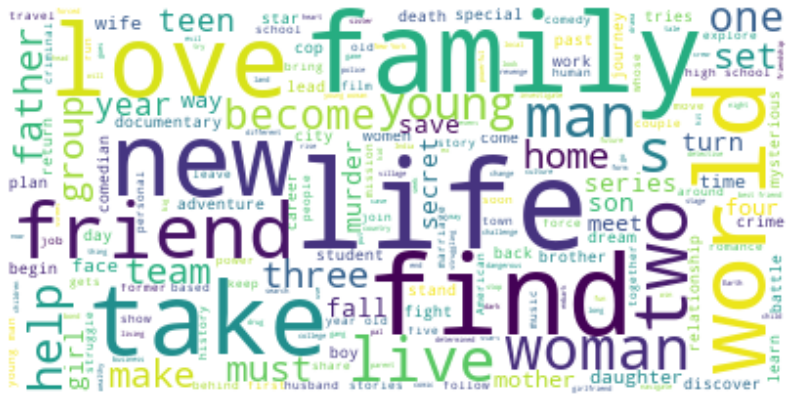

In [48]:
# Being a textual column lets create a word cloud of this column
plt.rcParams["figure.figsize"] = (14,10)
df_word_cloud = df['description']
text = " ".join(word for word in df_word_cloud)
# Stopwords list
stopwords = set(STOPWORDS)
# Generating word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# displaying the image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

- Here we have used a WordCloud to analyze the description of all the productions, ignoring their type.
- We can see that most of the descriptions contains words like 'family', 'life', 'friend', 'new', 'find' and so on. 

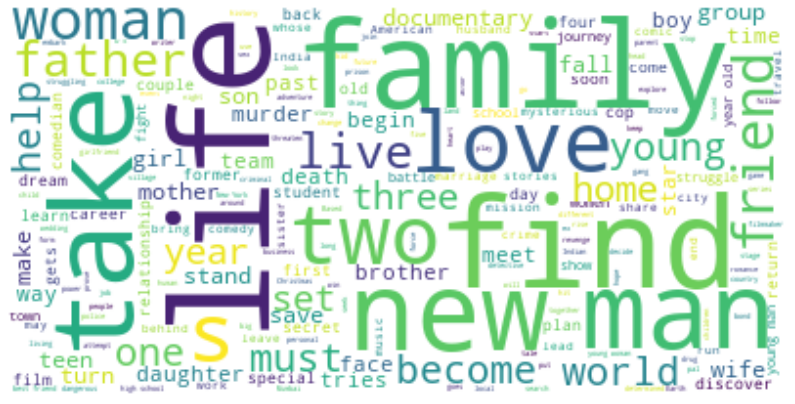

In [49]:
# Wordcloud on description of movies

plt.rcParams["figure.figsize"] = (14,10)
df_word_cloud = df_movies['description']
text = " ".join(word for word in df_word_cloud)
# Stopwords list
stopwords = set(STOPWORDS)
# Generating word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# displaying the image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

- Here, using the WordCloud we are analyzing the descriptions of only the productions that belong to movies type.
- We can observe that the words that are most used in the movies description are 'life', 'find', 'family', 'love', 'man' and 'women'.

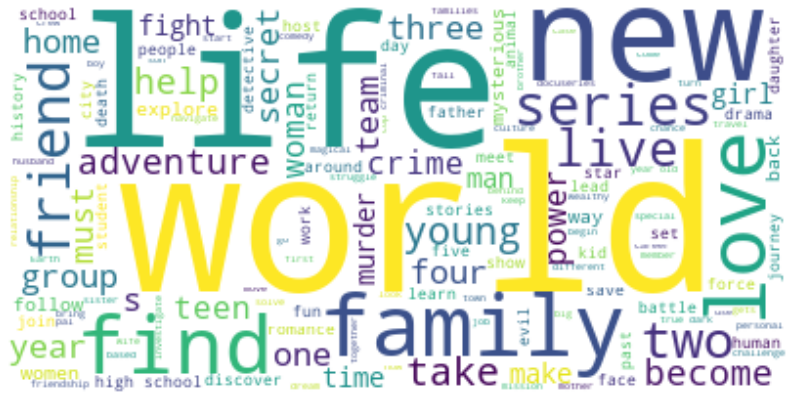

In [50]:
# Wordcloud on description of shows

plt.rcParams["figure.figsize"] = (14,10)
df_word_cloud = df_shows['description']
text = " ".join(word for word in df_word_cloud)
# Stopwords list
stopwords = set(STOPWORDS)
# Generating word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# displaying the image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

- Here we are using WordCloud to analyze the words that are used used in the descriptions that belong to tv shows.
- Here we can observe that 'life', 'world', 'family', 'love' and 'friend' are teh most used words.

Analyzing both movies and tv shows description, we can see that words like 'family', 'love' and 'friend' are the most used words.

### Country wise Genres preferred

#### Genre dataframe function

In [51]:
# this function would return the top 10 genres that are in the specific country.
def country_genre_count(df, country_name):
  country_genre_dict = {}
  for index, item in df.iterrows():
    if(type(item['country']) == str):
      countries = item['country'].split(', ')
      if country_name in countries:
        gen_list = []
        gen_list.extend(item['listed_in'].split(', '))
        for genre in gen_list:
          if genre in country_genre_dict:
            country_genre_dict[genre] += 1
          if genre not in country_genre_dict:
            country_genre_dict[genre] = 1 

  genre_dict_df = pd.DataFrame.from_dict(country_genre_dict, orient='index', columns = ['count'])
  genre_dict_df = genre_dict_df.sort_values('count', ascending = False)
  return genre_dict_df.head(10)

#### Bar Chart function

In [52]:
# this function would display the bar chart for that specific country
def bar_chart(country_data, name):
  plt.rcParams["figure.figsize"] = (10,8)
  country_data.plot(kind = 'bar')
  plt.title(f'Top genres watched in {name}')
  plt.show()

#### United States

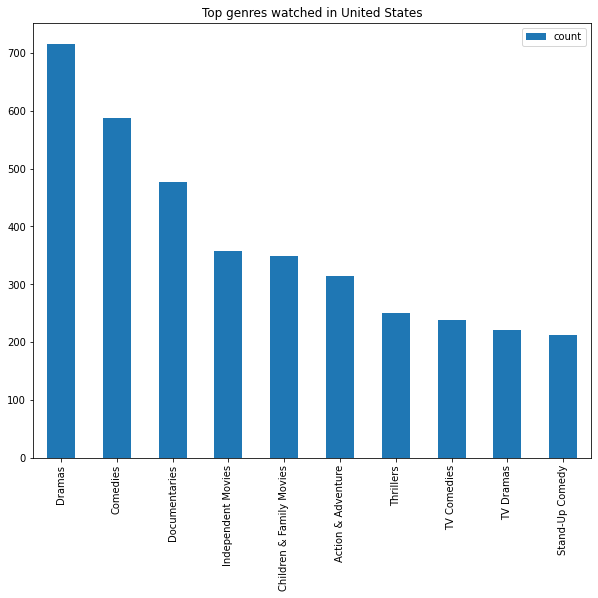

In [53]:
us_genre = country_genre_count(df, 'United States')
bar_chart(us_genre, 'United States')

#### India

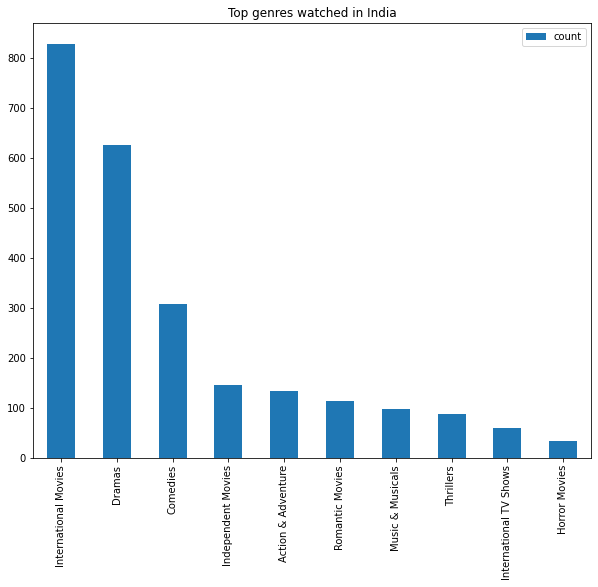

In [54]:
india_genre = country_genre_count(df, 'India')
bar_chart(india_genre, 'India')

#### United Kingdom

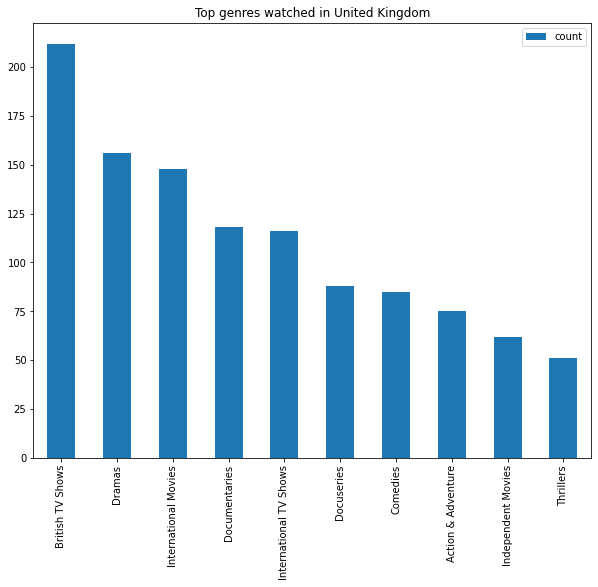

In [55]:
uk_genre = country_genre_count(df, 'United Kingdom')
bar_chart(uk_genre, 'United Kingdom')

#### Canada

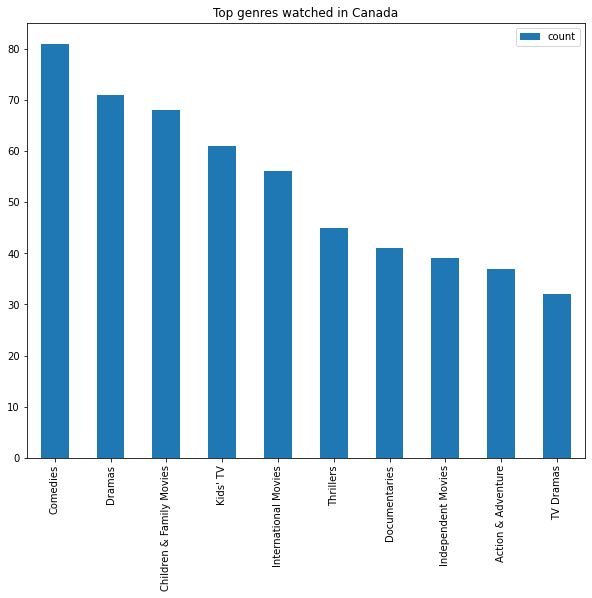

In [56]:
canada_genre = country_genre_count(df, 'Canada')
bar_chart(canada_genre, 'Canada')

#### France

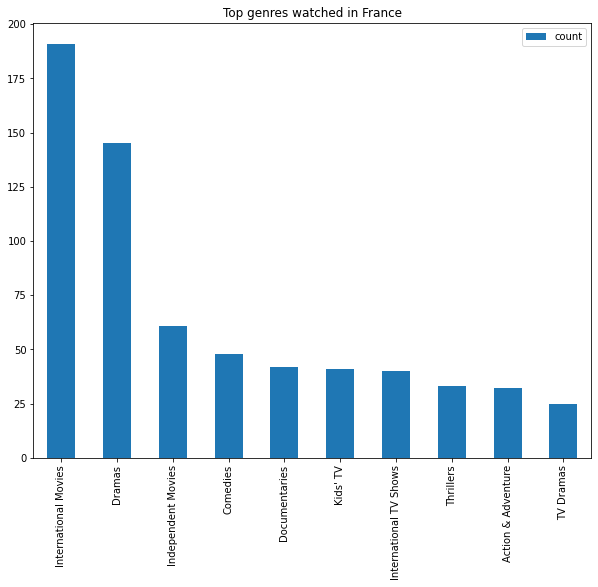

In [57]:
france_genre = country_genre_count(df, 'France')
bar_chart(france_genre, 'France')

#### Observations:


- We have used bar chart to analyse the top 10 genres that are preferred in the top 5 countries, namely 'United States', 'India', 'United Kingdom', 'Canada' and 'France'.
- Talking about the United States, Drama is the most preferred genre followed by Comedies and Documentary.
- In case of India, International movies are the most preferred genre followed by the Drama and Comedy.
- Coming to the United Kingdom, here British TV Shows is the top genre followed by the Drama and International movies.
- In case of Canada, Comedy is the top genre followed by Drama and Children and Family movies.
- For France, the top genre is International movies, followed by Drama and Independent Movies.
- Analyzing the records of the top 5 countries, we can see that Drama and Comedy are the two genres that are loved the most as they are in the top 10 for all the top 5 countries.

### Country wise Type analysis

#### type analysis dataframe function

In [68]:
# this function will return the dataframe containing values associated with production type for the specific country.
def country_type_count(df, country_name):
  country_type_dict = {}
  for index, item in df.iterrows():
    if(type(item['country']) == str):
      countries = item['country'].split(', ')
      if country_name in countries:
        type_list = []
        type_list.append(item['type'])
        for movie_type in type_list:
          if movie_type in country_type_dict:
            country_type_dict[movie_type] += 1
          if movie_type not in country_type_dict:
            country_type_dict[movie_type] = 1 

  type_dict_df = pd.DataFrame.from_dict(country_type_dict, orient='index', columns = ['count'])
  type_dict_df = type_dict_df.sort_values('count', ascending = False)
  return type_dict_df

#### Bar plot and pie chart function

In [69]:
# this function will plot the pie chart as well as the bar graph to see the difference.
def pie_bar_chart(df, name, label1, label2):
  fig, ax = plt.subplots(1,2, figsize = (10,5))
  # bar chart
  ax1 = plt.subplot(1,2,1)
  plt.pie(df['count'],
          labels=[label1, label2],
          explode = [0.1,0.1],
          startangle = 90,
          autopct = '%1.1f%%')

  # pie chart
  ax2 = plt.subplot(1,2,2)
  df.plot(kind='bar', ax=ax2)
  plt.xlabel('Type')
  plt.ylabel('Count')
  plt.suptitle(f'Type of content watched in {name}')
  plt.show()

#### United States

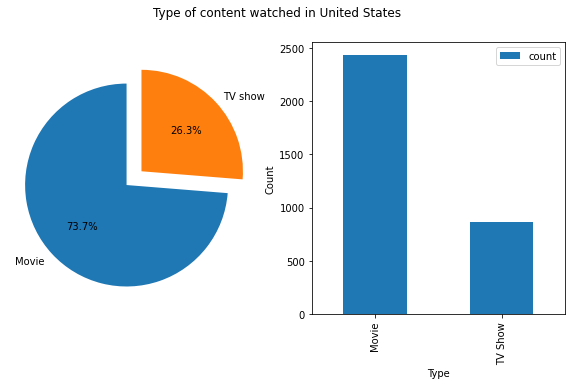

In [70]:
us_type = country_type_count(df, 'United States')
pie_bar_chart(us_type, 'United States', 'Movie', 'TV show')

#### India

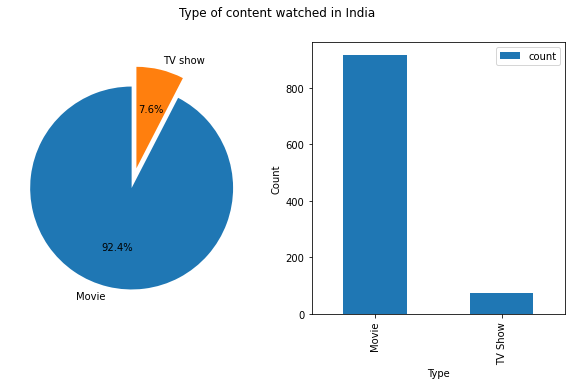

In [71]:
india_type = country_type_count(df, 'India')
pie_bar_chart(india_type, 'India', 'Movie', 'TV show')

#### United Kingdom

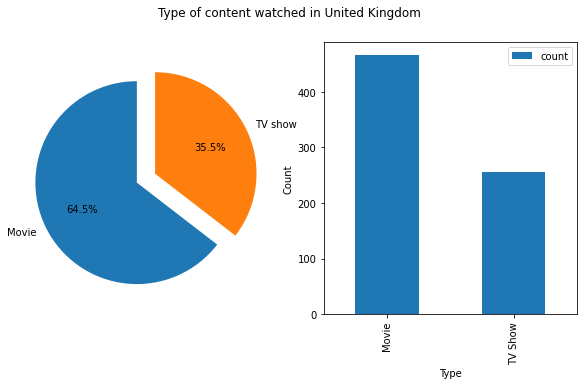

In [72]:
uk_type = country_type_count(df, 'United Kingdom')
pie_bar_chart(uk_type, 'United Kingdom', 'Movie', 'TV show')

#### Canada

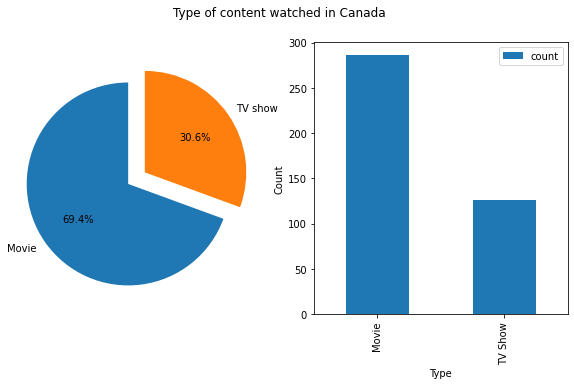

In [73]:
canada_type = country_type_count(df, 'Canada')
pie_bar_chart(canada_type, 'Canada', 'Movie', 'TV show')

#### France

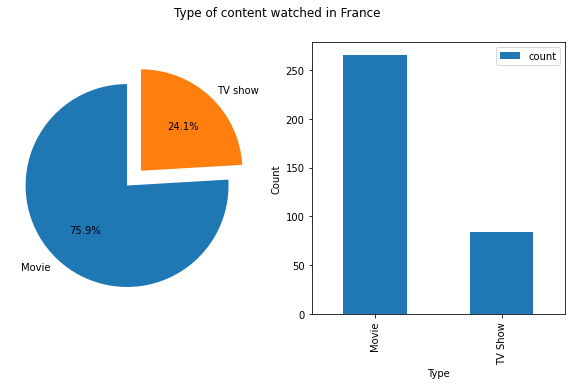

In [74]:
france_type = country_type_count(df, 'France')
pie_bar_chart(france_type, 'France', 'Movie', 'TV show')

#### Observations:


- For US, UK, France as well as Canada the percentage of movies out of the total production is in 60s or 70s but in case of India the count of movies is 92%.
- Further the percentage of tv shows are 26, 7, 35, 30 and 24 for US, India, UK, France and Canada respectively.

### Country wise rating analysis

#### Rating dataframe function

In [75]:
# this function will return dataframe which will store information regarding the rating.
def country_rating_count(df, country_name):
  country_rating_dict = {}
  for index, item in df.iterrows():
    if(type(item['country']) == str):
      countries = item['country'].split(', ')
      if country_name in countries:
        rating_list = []
        if type(item['rating']) == str:
          rating_list.extend(item['rating'].split(', '))
          for rating in rating_list:
            if rating in country_rating_dict:
              country_rating_dict[rating] += 1
            if rating not in country_rating_dict:
              country_rating_dict[rating] = 1 

  rating_dict_df = pd.DataFrame.from_dict(country_rating_dict, orient='index', columns = ['count'])
  rating_dict_df = rating_dict_df.sort_values('count', ascending = False)
  return rating_dict_df.head(10)

In [76]:
# this function will plot a bar graph as per the rating.
def rating_bar_plot(df, name):
  plt.rcParams["figure.figsize"] = (8,5)
  df.plot(kind = 'bar')
  plt.title(f'The content watched in {name} belongs to ratings')
  plt.show()

#### United States

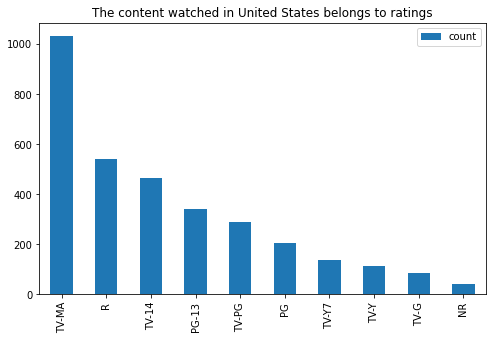

In [77]:
us_rating = country_rating_count(df, 'United States')
rating_bar_plot(us_rating, 'United States')

#### India

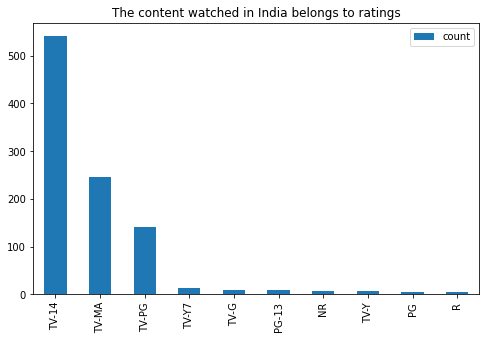

In [78]:
india_rating = country_rating_count(df, 'India')
rating_bar_plot(india_rating, 'India')

#### United Kingdom

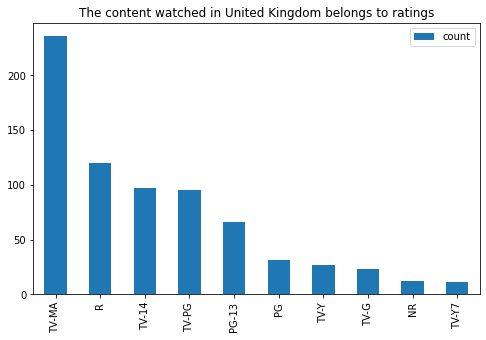

In [79]:
uk_rating = country_rating_count(df, 'United Kingdom')
rating_bar_plot(uk_rating, 'United Kingdom')

#### Canada

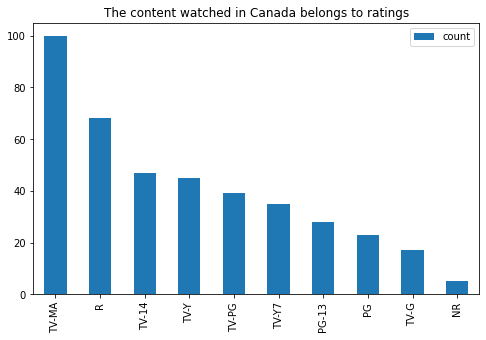

In [80]:
canada_rating = country_rating_count(df, 'Canada')
rating_bar_plot(canada_rating, 'Canada')

#### France

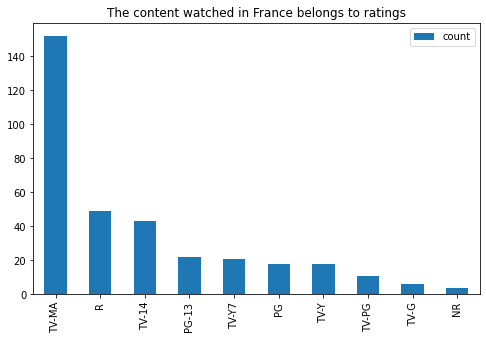

In [81]:
france_rating = country_rating_count(df, 'France')
rating_bar_plot(france_rating, 'France')

#### Observations:


- Among all the top 5 countries, 'TV-MA' is the top rating for all the countries except India whose top rating is 'TV-14'.
- Excluding India, 'TV-MA', 'TV-14' and 'R' are the most popular ratings for the other 4 countries.
- In India, the top 3 ratings are 'TV-MA', 'TV-14' and 'TV-PG'.

### Country wise word cloud for title

#### WordCloud funtion for titles

In [82]:
# This function will help plot WordCloud for the specific country w.r.t. titles.
def country_title_wc(df, country_name):
  
  country_title = ''
  for index, item in df.iterrows():
    if(type(item['country']) == str):
      countries = item['country'].split(', ')
      if country_name in countries:
        country_title += " " + item['title']
        
  plt.rcParams["figure.figsize"] = (10,8)
  stopwords = set(STOPWORDS)
  wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(country_title)
  plt.imshow(wordcloud, interpolation = 'bilinear')
  plt.axis('off')
  plt.title(f'WordCloud of titles for {country_name}')
  plt.show()

#### United States

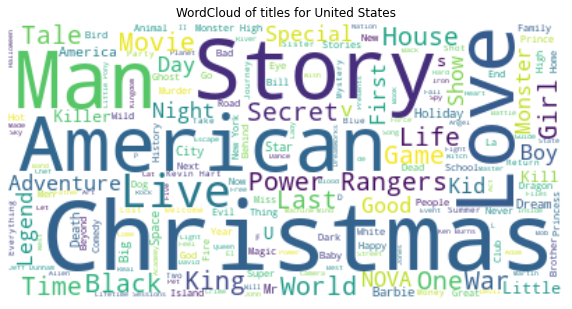

In [83]:
country_title_wc(df, 'United States')

#### India

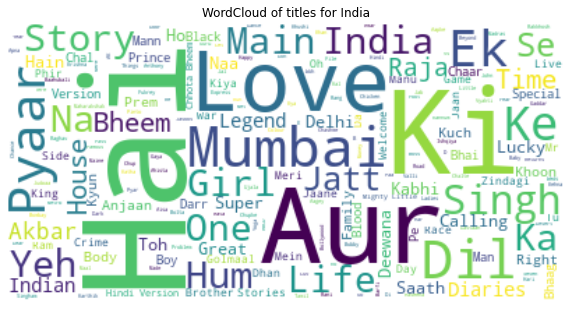

In [84]:
country_title_wc(df, 'India')

#### United Kingdom

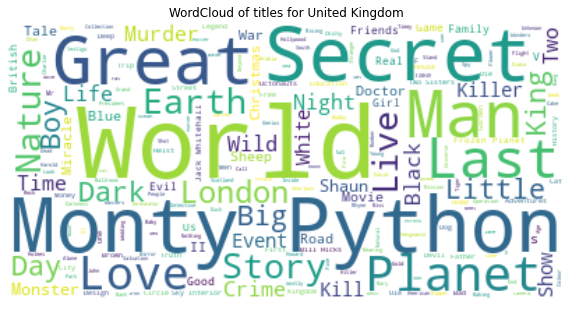

In [85]:
country_title_wc(df, 'United Kingdom')

#### Canada

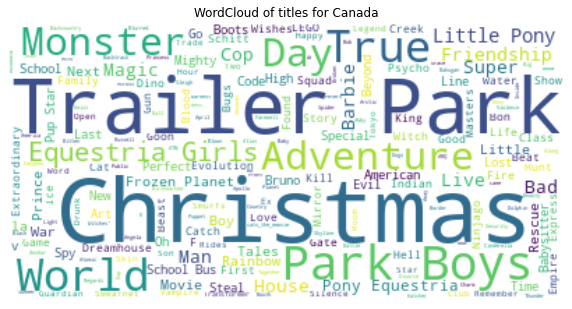

In [86]:
country_title_wc(df, 'Canada')

#### France

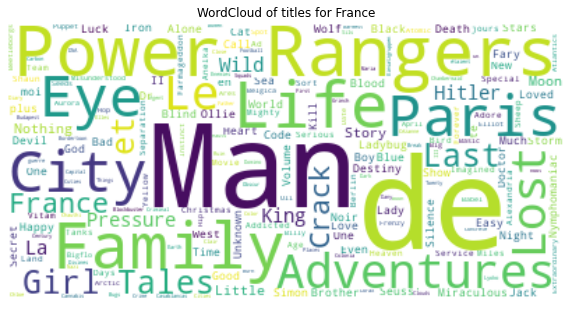

In [87]:
country_title_wc(df, 'France')

#### Observations


- The most used words in the title of US productions are 'Christmas', 'man', 'Story', 'Love', 'America' and so on.
- The most used words in the title of India productions are 'Mumbai', 'Love', 'Story', 'Pyaar', 'Ek' and so on.
- The most used words in the title of UK productions are 'Python', 'World', 'Monty', 'Secret', 'Planet' and so on.
- The most used words in the title of the Canada are 'Christmas', 'trailer', 'Park', 'Park', 'Boys' and so on.
- The most used words in the title of the France are 'Man', 'de', 'Power', 'Rangers', 'Family' and so on.

### Country wise word cloud for description

#### WordCloud function for description

In [88]:
# This function will plot WordCloud of description for the specific country
def country_desc_wc(df, country_name):
  
  country_desc = ''
  for index, item in df.iterrows():
    if(type(item['country']) == str):
      countries = item['country'].split(', ')
      if country_name in countries:
        country_desc += " " + item['description']
        
  plt.rcParams["figure.figsize"] = (10,8)
  stopwords = set(STOPWORDS)
  wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(country_desc)
  plt.imshow(wordcloud, interpolation = 'bilinear')
  plt.title(f'WordCloud of description for {country_name}')
  plt.axis('off')
  plt.show()

#### United States

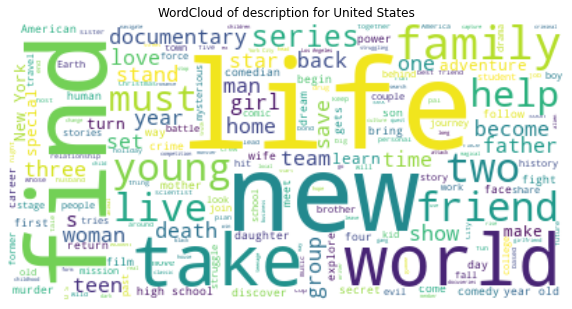

In [89]:
country_desc_wc(df, 'United States')

#### India

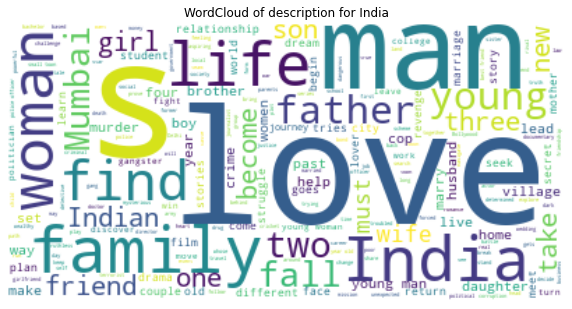

In [90]:
country_desc_wc(df, 'India')

#### United Kingdom

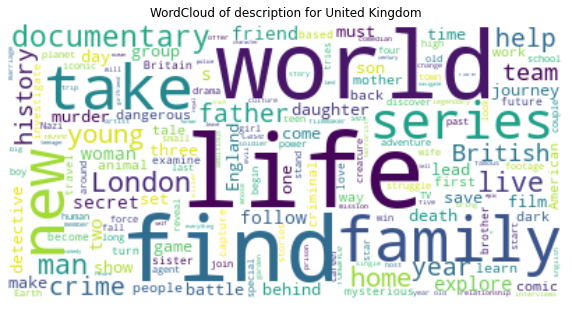

In [91]:
country_desc_wc(df, 'United Kingdom')

#### Canada

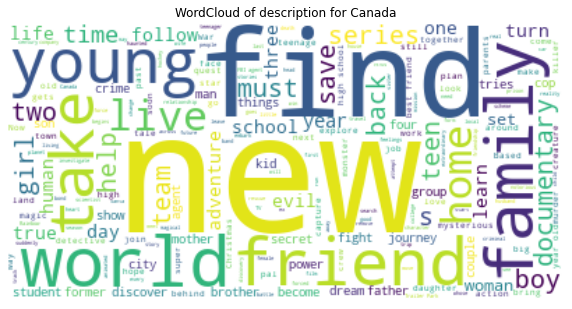

In [92]:
country_desc_wc(df, 'Canada')

#### France

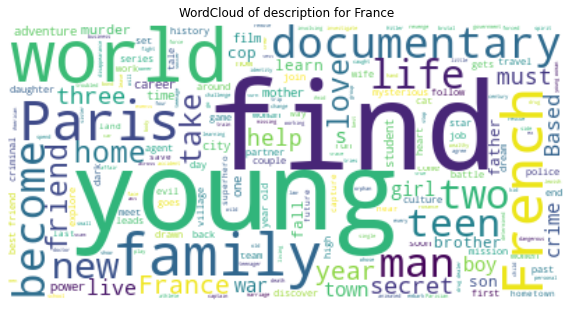

In [93]:
country_desc_wc(df, 'France')

#### Observations

- Most common words used in the description of US movies are 'life', 'find', 'new', 'family', 'take', 'world' and so on.
- Most common words used in the description of India movies are 'love', 'man', 'find', 'family', 'life', 'India' and so on.
- Most common words used in the description of UK movies are 'life', 'find', 'world', 'family', 'take', 'series' and so on.
- Most common words used in the description of Canada movies are 'new', 'find', 'young', 'take', 'family' and so on.
- Most common words used in the description of France movies are 'find', 'young', 'world', 'family', 'French' and so on.
- So overall the most words used in the desctiption of movies in top 5 countries are 'family', 'life' and 'friend'.

### Type produced over time

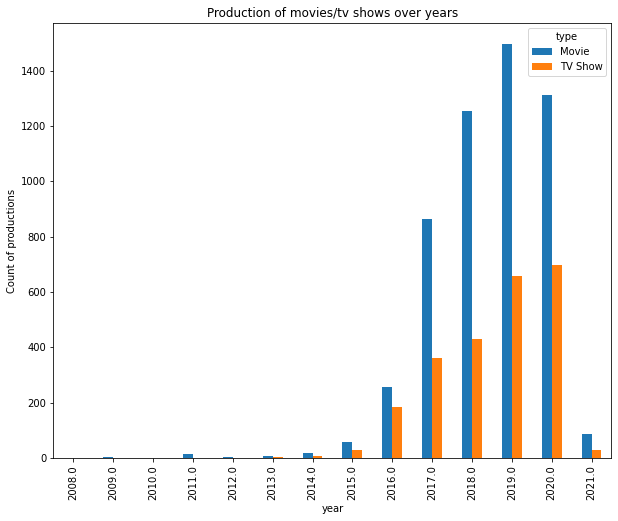

In [103]:
plt.rcParams["figure.figsize"] = (10,8)
df.groupby(['year', 'type'])['show_id'].count().unstack().plot(kind='bar')
plt.title('Production of movies/tv shows over years')
plt.ylabel('Count of productions')
plt.show()

- The above graph shows the number of productions over the years, we can see that the number of movies as well as the tv shows have increased exponentially from 2010 to 2020.
- The rate of number of movies as well as tv shows have shown a very rapid rise.

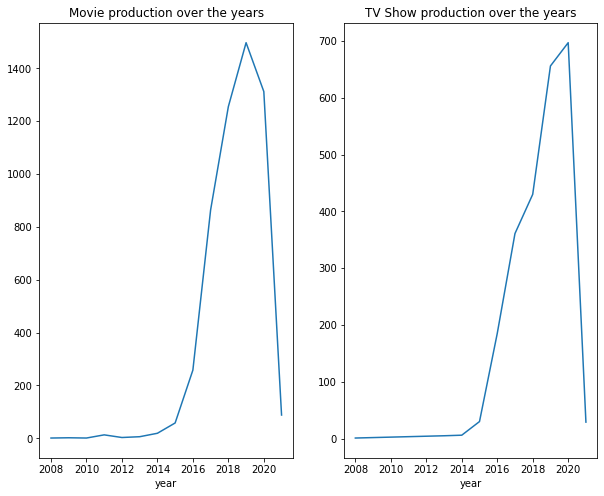

In [104]:
fig, ax = plt.subplots(1,2, figsize = (10,8))
# line chart for movies
ax1 = plt.subplot(1,2,1)
df[df['type'] == 'Movie'].groupby('year')['show_id'].count().plot(kind='line', ax=ax1)
plt.title('Movie production over the years')

# line chart for tv shows
ax2 = plt.subplot(1,2,2)
df[df['type'] == 'TV Show'].groupby('year')['show_id'].count().plot(kind='line', ax=ax2)
plt.title('TV Show production over the years')
plt.show()

- Observing the graph, we can see that the production of movies have shown a rapid growth and have gone to around more than 1400 in 2018-19.
- In case of tv shows, the productions numbers have gone to around 700 in the year 2019.
- We can see that although the number of tv show productions have risen drastically, the number of movies are still double the number of tv shows.

## Clustering

### Handling the null values

In [112]:
# First of all lets substitute the null values with an empty string
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast               0
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
year              10
month             10
dtype: int64

- We'll be using the data from columns like director, cast, country, rating, listed_in, and description. Therefore we will fill the null values present in these columns using an empty string and then create a new column which will help us in clustering.

In [113]:
# substituting null values with empty string for director column
df['director'] = df['director'].fillna('')

In [114]:
# substituting null values with empty string for cast column
df['cast'] = df['cast'].fillna('')

In [115]:
# substituting null values with empty string for rating column
df['rating'] = df['rating'].fillna('')

In [116]:
# substituting null values with empty string for country column
df['country'] = df['country'].fillna('')

In [117]:
# checking the null values
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
year            10
month           10
dtype: int64

In [118]:
# Creating a final column by concatenating the director, cast, country, rating, listed_in and description column.
df['final'] = df['director'] + ' ' + df['cast'] + ' ' + df['country'] + ' ' + df['rating'] + ' ' + df['listed_in'] + ' ' + df['description']

In [119]:
# checking the first value of the final column.
df['final'][0]

' João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi Brazil TV-MA International TV Shows, TV Dramas, TV Sci-Fi & Fantasy In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

###<h3> Text preprocessing

In [ ]:
# Removing the punctuations for the final column strings.
import re 
def remove_punc(x):
    return re.sub(r"[^a-zA-Z ]","",str(x))
df['final'] = df['final'].apply(remove_punc)

In [ ]:
# converting all the values to lower case.
df['final'] = df['final'].str.lower()

In [ ]:
from nltk.corpus import stopwords 
sw=stopwords.words('english')

In [ ]:
df['final']

0        joo miguel bianca comparato michel gomes rodo...
1       jorge michel grau demin bichir hctor bonilla o...
2       gilbert chan tedd chan stella chung henley hii...
3       shane acker elijah wood john c reilly jennifer...
4       robert luketic jim sturgess kevin spacey kate ...
                              ...                        
7782    josef fares imad creidi antoinette turk elias ...
7783    mozez singh vicky kaushal sarahjane dias raagh...
7784     nasty c  tvma documentaries international mov...
7785     adriano zumbo rachel khoo australia tvpg inte...
7786    sam dunn  united kingdom canada united states ...
Name: final, Length: 7787, dtype: object

In [ ]:
stemmer = SnowballStemmer('english')
stop_words = sw

In [ ]:
# Removing the stop words from the final column
for index, item in df.iterrows():
  filtered_words = []
  tokens = word_tokenize(item['final'])
  for word in tokens:
    if word not in stop_words:
      filtered_words.append(word)

  df.at[index, 'final'] = ' '.join(filtered_words)

In [ ]:
# checking the values after removing the punctuations, stop words and converting the words to lower case characters
df['final']

0       joo miguel bianca comparato michel gomes rodol...
1       jorge michel grau demin bichir hctor bonilla o...
2       gilbert chan tedd chan stella chung henley hii...
3       shane acker elijah wood john c reilly jennifer...
4       robert luketic jim sturgess kevin spacey kate ...
                              ...                        
7782    josef fares imad creidi antoinette turk elias ...
7783    mozez singh vicky kaushal sarahjane dias raagh...
7784    nasty c tvma documentaries international movie...
7785    adriano zumbo rachel khoo australia tvpg inter...
7786    sam dunn united kingdom canada united states t...
Name: final, Length: 7787, dtype: object

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# function to lemmatize the words
def lemmatize_verbs(words):
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    word_list = words.split(' ')
    for word in word_list:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [ ]:
# lemmatizing the words present in the final column
for index, item in df.iterrows():
  df.at[index, 'final'] = ' '.join(lemmatize_verbs(item['final']))

In [ ]:
df['final']

0       joo miguel bianca comparato michel gomes rodol...
1       jorge michel grau demin bichir hctor bonilla o...
2       gilbert chan tedd chan stella chung henley hii...
3       shane acker elijah wood john c reilly jennifer...
4       robert luketic jim sturgess kevin spacey kate ...
                              ...                        
7782    josef fare imad creidi antoinette turk elias g...
7783    mozez singh vicky kaushal sarahjane dias raagh...
7784    nasty c tvma documentaries international movie...
7785    adriano zumbo rachel khoo australia tvpg inter...
7786    sam dunn unite kingdom canada unite state tvma...
Name: final, Length: 7787, dtype: object

In [ ]:
final_words = df.final

In [ ]:
# We will be using final_words for the clustering purpose.
final_words

0       joo miguel bianca comparato michel gomes rodol...
1       jorge michel grau demin bichir hctor bonilla o...
2       gilbert chan tedd chan stella chung henley hii...
3       shane acker elijah wood john c reilly jennifer...
4       robert luketic jim sturgess kevin spacey kate ...
                              ...                        
7782    josef fare imad creidi antoinette turk elias g...
7783    mozez singh vicky kaushal sarahjane dias raagh...
7784    nasty c tvma documentaries international movie...
7785    adriano zumbo rachel khoo australia tvpg inter...
7786    sam dunn unite kingdom canada unite state tvma...
Name: final, Length: 7787, dtype: object

###<h3> TFIDF Vectorization

In [ ]:
# Using the TFIDF vectorizer to vectorize the strings
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 20000)
x_tfidf = vectorizer.fit_transform(final_words)

In [ ]:
x_tfidf

<7787x20000 sparse matrix of type '<class 'numpy.float64'>'
	with 251585 stored elements in Compressed Sparse Row format>

In [ ]:
x_tfidf.shape

(7787, 20000)

###<h3> PCA for dimensionality reduction

In [ ]:
# Using the Principal component analysis for the dimensionality reduction.
from sklearn.decomposition import PCA
transformer = PCA(random_state = 0)
transformer.fit(x_tfidf.toarray())

PCA(random_state=0)

Text(0, 0.5, 'cumulative explained variance')

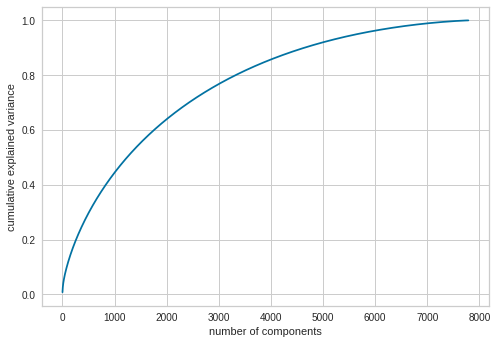

In [ ]:
plt.plot(np.cumsum(transformer.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

We can see that 3500 components are explaining 80% of the variance therefore we'll be using 3500 components.

In [ ]:
transformer = PCA(n_components = 3500, random_state = 0)
transformer.fit(x_tfidf.toarray())
x_new = transformer.transform(x_tfidf.toarray())

In [ ]:
x_new.shape

(7787, 3500)

In [ ]:
# vectorizing the data
x_vectorized = vectorizer.transform(final_words)

In [ ]:
# applying the PCA
x = transformer.transform(x_vectorized.toarray())

###<h3> Clustering Implementation

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

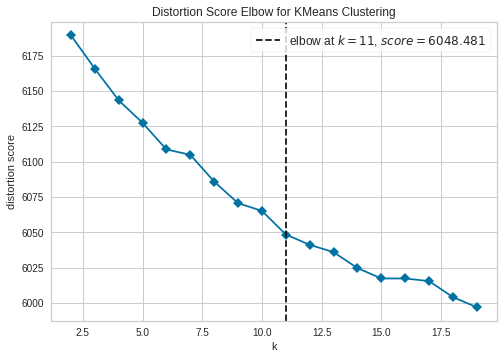

In [ ]:
kmc = KMeans()
visualize = KElbowVisualizer(kmc, k=(2,20), metrics='silhouette', timings = False)
# We will take timing as False since we do not have time constraints.
visualize.fit(x)
visualize.show()

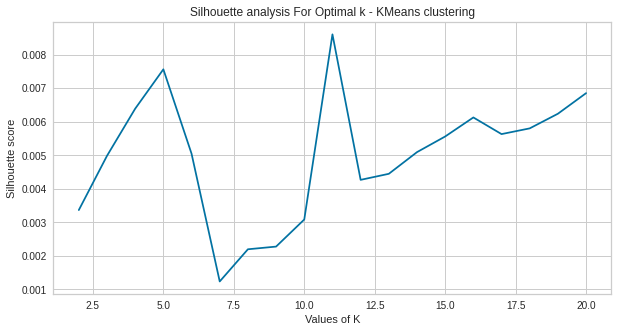

In [ ]:
# Plotting Silhouette score for different umber of clusters
range_n_clusters = range(2,21)
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialize kmeans
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=0)
  kmeans.fit(x)
  cluster_labels = kmeans.labels_
 
  # silhouette score
  silhouette_avg.append(silhouette_score(x, cluster_labels))

plt.figure(figsize=(10,5))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
# Instantiate the clustering model and visualizer
for i in range(2, 20):
  model = KMeans(i, random_state=0)
  visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
  visualizer.fit(x)        # Fit the data to the visualizer
  visualizer.show()        # Finalize and render the figure

- Since we are getting maximum score at k = 11 so let's take the value of 'k' as 11 for clustering. 

<h3> Using the value of k as 11

In [ ]:
# Clustering the data into 7 clusters
kmeans = KMeans(n_clusters=7,init='k-means++',random_state=0)
kmeans.fit(x)

In [ ]:
#predict the labels of clusters.
label = kmeans.fit_predict(x)

In [ ]:
# kmeans label to cluster column
df['cluster'] = kmeans.labels_

In [ ]:
df.head()

- We will be taking help of WordCloud to give names for the differenct clusters taking the help of description column.

In [ ]:
#word cloud for user rating review
def cluster_word_cloud(cluster_number,column_name):
  df_word_cloud = df[['cluster',column_name]].dropna()
  df_word_cloud = df_word_cloud[df_word_cloud['cluster']==cluster_number]
  text = " ".join(word for word in df_word_cloud[column_name])
  # Create stopword list:
  stopwords = set(STOPWORDS)
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # displaying the word cloud
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

In [ ]:
# Word cloud for the description column
for i in range():
  cluster_word_cloud()

In [ ]:
# Word cloud for the listed_in column
for i in range():
  cluster_word_cloud()

In [ ]:
# Word cloud for the title column
for i in range():
  cluster_word_cloud()

In [ ]:
# Name different clusters and show their data.